In [1]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df_seq = pd.read_csv('sequential_time.csv')
df_seq.head(10)

,data_name,threshold,n pairs,Split_1,Split_2,Total time
0,scifact_subset_100_AUG,0.15,246,0.098816,2.133538,2.232354
1,scifact_subset_100_AUG,0.50,20,0.076668,2.146812,2.223480
2,scifact_subset_100_AUG,0.85,20,0.069757,2.130914,2.200672
3,nfcorpus_subset_200_AUG,0.15,1052,0.147173,8.871944,9.019116
4,nfcorpus_subset_200_AUG,0.50,40,0.156356,8.681628,8.837984
5,nfcorpus_subset_200_AUG,0.85,40,0.151624,8.496435,8.648059
6,quora_subset_500_AUG,0.15,2264,0.100036,53.610432,53.710468
7,quora_subset_500_AUG,0.50,111,0.107693,50.677548,50.785241
8,quora_subset_500_AUG,0.85,100,0.104115,31.997395,32.101510


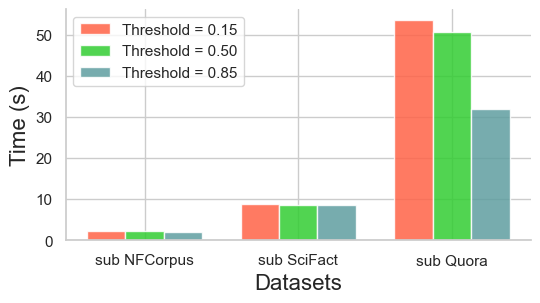

In [3]:
barWidth = 0.25
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sb.set_theme(style="whitegrid", rc=custom_params)
x = np.array([1, 2, 3])
plt.figure(figsize=(6, 3))
plt.bar(x, df_seq[df_seq["threshold"] == 0.15]["Split_2"], label="Threshold = 0.15", width=barWidth, color='tomato', alpha = 0.85)
plt.bar(x + barWidth, df_seq[df_seq["threshold"] == 0.50]["Split_2"], label="Threshold = 0.50", width=barWidth, color='limegreen', alpha = 0.85)
plt.bar(x + 2*barWidth, df_seq[df_seq["threshold"] == 0.85]["Split_2"], label="Threshold = 0.85", width=barWidth, color='cadetblue', alpha = 0.85)
plt.xticks(x + barWidth, ('sub NFCorpus', 'sub SciFact', 'sub Quora'))
# plt.yticks(range(0, 10000, 1000))
plt.xlabel("Datasets", fontsize=16)
plt.ylabel("Time (s)", fontsize=16)
plt.legend()
plt.savefig('seq_time.png', format='png', dpi=400, bbox_inches='tight')


In [4]:
df_spark = pd.read_csv('spark_time.csv')
df_spark.head(10)

,data_name,threshold,worker,algorithm,preprocess_time,process_time,total_time
0,scifact_subset_100_AUG,0.15,1,v1,0.054183,25.720546,25.774729
1,nfcorpus_subset_200_AUG,0.15,1,v1,0.110199,81.813411,81.923609
2,quora_subset_500_AUG,0.15,1,v1,0.039574,34.712332,34.751906
3,scifact_subset_100_AUG,0.50,1,v1,0.045954,19.589520,19.635474
4,nfcorpus_subset_200_AUG,0.50,1,v1,0.104878,77.281151,77.386029
5,quora_subset_500_AUG,0.50,1,v1,0.040807,34.536635,34.577443
6,scifact_subset_100_AUG,0.85,1,v1,0.046383,19.572333,19.618717
7,nfcorpus_subset_200_AUG,0.85,1,v1,0.105004,79.034668,79.139672
8,quora_subset_500_AUG,0.85,1,v1,0.039744,34.652065,34.691809
9,scifact_subset_100_AUG,0.15,2,v1,0.050749,22.390198,22.440947


In [5]:
df_spark[df_spark["algorithm"]=="v1"]["process_time"].var()

1331.9093420148909

In [6]:
df_spark[df_spark["algorithm"]=="v2"]["process_time"].var()

305.5822397969772

In [7]:
df_spark[df_spark["algorithm"]=="v3"]["process_time"].var()

159.1216673944884

In [13]:
df_spark[df_spark["data_name"] == "quora_subset_500_AUG"]["process_time"].mean()

25.172528968917

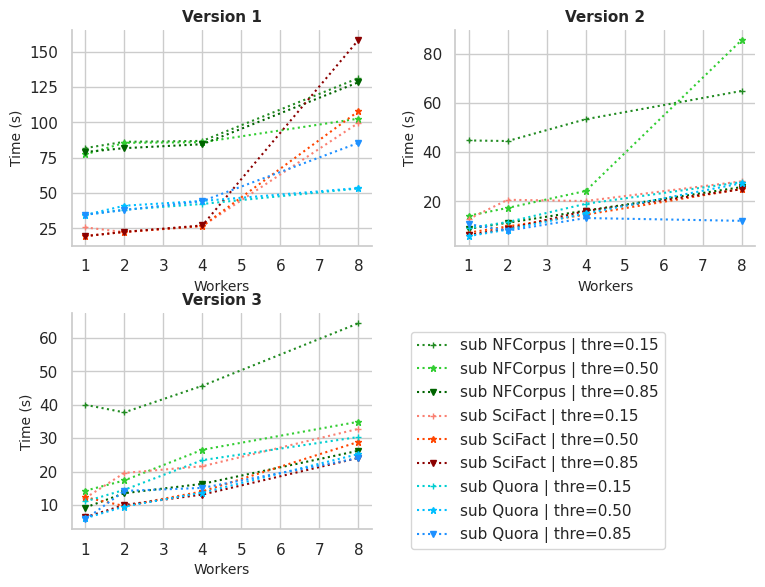

In [31]:
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sb.set_theme(style="whitegrid", rc=custom_params)
fig, axs = plt.subplots(2, 2, figsize=(8,6))
fig.tight_layout(pad=2)
axs = axs.flatten()
axs[3].set_axis_off()
for e, v in enumerate(["v1", "v2", "v3"]):
    axs[e].set_title(f"Version {e+1}", fontsize=11, fontweight="bold")
    axs[e].plot([1, 2, 4, 8],  df_spark[(df_spark["algorithm"] == v) & (df_spark["data_name"] == "nfcorpus_subset_200_AUG") & (df_spark["threshold"] == .15)]["process_time"], linestyle=':', marker='+', color="forestgreen", ms=5, label="sub NFCorpus | thre=0.15")
    axs[e].plot([1, 2, 4, 8],  df_spark[(df_spark["algorithm"] == v) & (df_spark["data_name"] == "nfcorpus_subset_200_AUG") & (df_spark["threshold"] == .5)]["process_time"], linestyle=':', marker='*', color="limegreen", ms=5, label="sub NFCorpus | thre=0.50")
    axs[e].plot([1, 2, 4, 8],  df_spark[(df_spark["algorithm"] == v) & (df_spark["data_name"] == "nfcorpus_subset_200_AUG") & (df_spark["threshold"] == .85)]["process_time"], linestyle=':', marker='v', color="darkgreen", ms=5, label="sub NFCorpus | thre=0.85")
    
    axs[e].plot([1, 2, 4, 8],  df_spark[(df_spark["algorithm"] == v) & (df_spark["data_name"] == "scifact_subset_100_AUG") & (df_spark["threshold"] == .15)]["process_time"], linestyle=':', marker='+', color="salmon", ms=5, label="sub SciFact | thre=0.15")
    axs[e].plot([1, 2, 4, 8],  df_spark[(df_spark["algorithm"] == v) & (df_spark["data_name"] == "scifact_subset_100_AUG") & (df_spark["threshold"] == .5)]["process_time"], linestyle=':', marker='*', color="orangered", ms=5, label="sub SciFact | thre=0.50")
    axs[e].plot([1, 2, 4, 8],  df_spark[(df_spark["algorithm"] == v) & (df_spark["data_name"] == "scifact_subset_100_AUG") & (df_spark["threshold"] == .85)]["process_time"], linestyle=':', marker='v', color="darkred", ms=5, label="sub SciFact | thre=0.85")
    
    axs[e].plot([1, 2, 4, 8],  df_spark[(df_spark["algorithm"] == v) & (df_spark["data_name"] == "quora_subset_500_AUG") & (df_spark["threshold"] == .15)]["process_time"], linestyle=':', marker='+', color="darkturquoise", ms=5, label="sub Quora | thre=0.15")
    axs[e].plot([1, 2, 4, 8],  df_spark[(df_spark["algorithm"] == v) & (df_spark["data_name"] == "quora_subset_500_AUG") & (df_spark["threshold"] == .5)]["process_time"], linestyle=':', marker='*', color="deepskyblue", ms=5, label="sub Quora | thre=0.50")
    axs[e].plot([1, 2, 4, 8],  df_spark[(df_spark["algorithm"] == v) & (df_spark["data_name"] == "quora_subset_500_AUG") & (df_spark["threshold"] == .85)]["process_time"], linestyle=':', marker='v', color="dodgerblue", ms=5, label="sub Quora | thre=0.85")
    axs[e].set_xticks(range(1, 9))
#     axs[e].set_yticks(range(0, 45, 5))
    axs[e].set_xlabel("Workers", fontsize=10)
    axs[e].set_ylabel("Time (s)", fontsize=10)
    
axs[e].legend(bbox_to_anchor=(2, .95))
plt.savefig('spark_time.png', format='png', dpi=400, bbox_inches='tight')
    
    


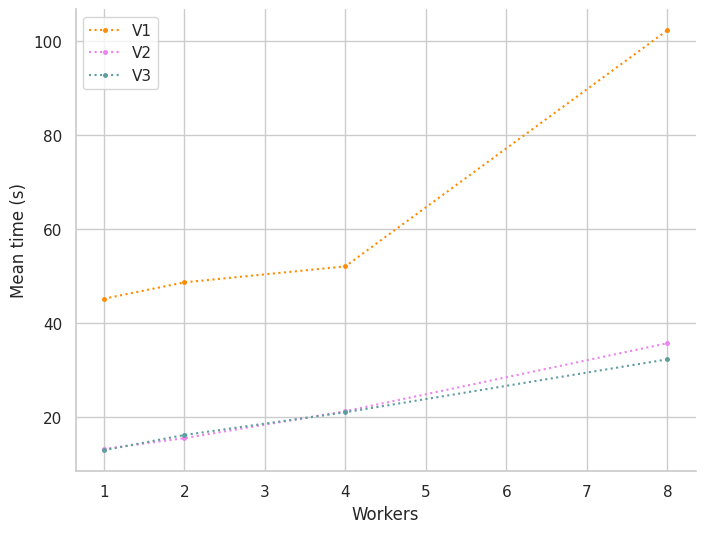

In [19]:
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sb.set_theme(style="whitegrid", rc=custom_params)
plt.figure(figsize=(8,6))
plt.plot([1, 2, 4, 8],  [df_spark[(df_spark["algorithm"] == "v1") & (df_spark["worker"] == i)]["process_time"].mean()  for i in [1, 2, 4, 8]], linestyle=':', marker='.', color="darkorange", ms=5, label="V1")
plt.plot([1, 2, 4, 8],  [df_spark[(df_spark["algorithm"] == "v2") & (df_spark["worker"] == i)]["process_time"].mean()  for i in [1, 2, 4, 8]], linestyle=':', marker='.', color="violet", ms=5, label="V2")
plt.plot([1, 2, 4, 8],  [df_spark[(df_spark["algorithm"] == "v3") & (df_spark["worker"] == i)]["process_time"].mean()  for i in [1, 2, 4, 8]], linestyle=':', marker='.', color="cadetblue", ms=5, label="V3")
plt.xlabel("Workers")
plt.ylabel("Mean time (s)")
plt.legend()
plt.savefig('spark_best.png', format='png', dpi=400, bbox_inches='tight')